In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\multiple-disease-prediction-final\multiple-disease-prediction-final\Dataset\heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


1    165
0    138
Name: target, dtype: int64


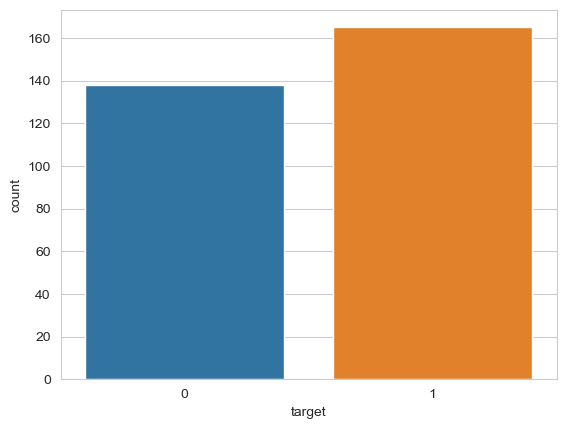

In [7]:
print(data.target.value_counts())
sns.set_style('whitegrid')
sns.countplot(x = 'target', data = data)

In [8]:
categorical_variable = []
continuous_variable = []

for column in data.columns:
  if(len(data[column].unique())<=10):
    categorical_variable.append(column)
  else:
    continuous_variable.append(column)


In [9]:
categorical_variable

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [10]:
continuous_variable

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [11]:
dataset = data.copy()
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


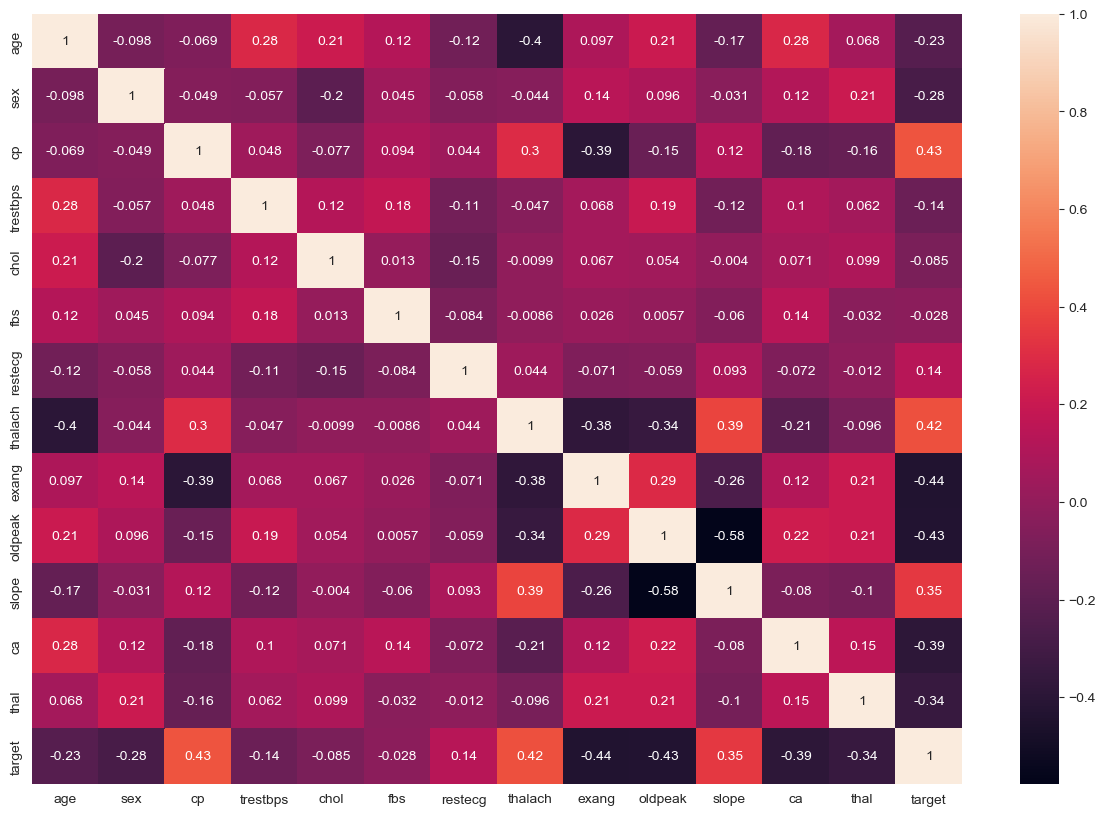

In [12]:
corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

In [13]:
X = dataset.drop(columns='target',axis=1)
y = dataset['target']

In [14]:
print("Shape of dataset ",dataset.shape)
print("Shape of X ", X.shape)
print("Shape of Y ",y.shape)
print(X.columns)

Shape of dataset  (303, 14)
Shape of X  (303, 13)
Shape of Y  (303,)
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [15]:
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier 

X_train,X_test ,y_train,y_test = tts(X,y,test_size=0.2,random_state = 42)
# model1 = RandomForestClassifier(n_estimators=20)
# model1.fit(X_train,y_train)
#83.61

# from sklearn.tree import DecisionTreeClassifier
# model1 = DecisionTreeClassifier()
# model1.fit(X_train,y_train)
#80.33

from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()
model1.fit(X_train, y_train)
#86.89


GaussianNB(priors=None, var_smoothing=1e-09)

In [16]:
pred1 = model1.predict(X_test)
pred1[:10]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred1)

array([[26,  3],
       [ 5, 27]], dtype=int64)

In [18]:
from sklearn.metrics import accuracy_score
print(f"Accuracy of model is {round(accuracy_score(y_test, pred1)*100, 2)}%")

Accuracy of model is 86.89%


In [19]:
from sklearn.model_selection import RandomizedSearchCV

classifier = RandomForestClassifier(n_jobs=-1)


In [20]:
from scipy.stats import randint
param_dist={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
              'max_features':randint(1,31),
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,31),
              }

In [21]:
search_clfr = RandomizedSearchCV(classifier, param_distributions = param_dist, n_jobs=-1, n_iter = 40, cv = 9)

In [22]:
search_clfr.fit(X_train, y_train)

RandomizedSearchCV(cv=9, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [23]:
params = search_clfr.best_params_
score = search_clfr.best_score_
print(params)
print(score)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 26, 'n_estimators': 400}
0.8265273820829376


In [24]:
claasifier=RandomForestClassifier(n_jobs=-1, n_estimators=400,bootstrap= False,criterion='gini',max_depth=5,max_features=3,min_samples_leaf= 7)

In [25]:
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [26]:
pred2 = classifier.predict(X_test)
confusion_matrix(y_test,pred2)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [27]:
print(f"Accuracy is {round(accuracy_score(y_test, classifier.predict(X_test))*100,2)}%")

Accuracy is 85.25%


In [28]:
import pickle
pickle.dump(classifier,open('heart.pkl','wb'))